In [7]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import sin 
from numpy import cos
from math import acos
from math import atan
from math import radians
from math import sqrt

class Vehicle:
    
    def __init__(self, v = 500, x = 0, z = 0, y = 0, theta = 0, phi = 0):
        self.position = []
        self.v = v
        self.theta = theta
        self.phi = phi
        self.x = x
        self.z = z
        self.y = y
        self.r = sqrt(self.x**2 + self.z**2 + self.y**2)
        self.dx = self.dz = self.dy = 0
        self.position.append([self.x, self.z, self.y])
    
    def update(self, dv, dtheta, dphi, dt):
        self.v += dv
        self.r = self.v * dt
        self.theta += dtheta
        self.phi += dphi
        self.dx = self.r * cos(self.theta) * cos(self.phi)
        self.dz = self.r * cos(self.theta) * sin(self.phi)
        self.dy = self.r * sin(self.theta)   
        self.x += self.dx #if abs(self.dx) > (0.0001 * dt) else 0
        self.z += self.dz #if abs(self.dz) > (0.0001 * dt) else 0
        self.y += self.dy #if abs(self.dy) > (0.0001 * dt) else 0
        self.position.append([self.x, self.z, self.y])
        
class RungeKutta:
    def __init__(self, f, t0, y0, dt):
        self.f = f
        self.t0 = t0
        self.y0 = y0
        self.dt = dt
        
    def rungeKuttaSolve(self):
        k1 = self.f(self.t0, self.y0)
        k2 = self.f(self.t0 + 0.5 * self.dt, self.y0 + 0.5 * k1)
        k3 = self.f(self.t0 + 0.5 * self.dt, self.y0 + 0.5 * k2)
        k4 = self.f(self.t0 + self.dt, self.y0 + k3)
        y = (k1 + k2 + k2 + k3 + k3 + k4) / 6
        
        return y
        
    
def D_dotf(t, D):
    delta_D = target.v * cos(sigma0-target.phi) * cos(epsilon0-target.theta) - missile.v * cos(sigma0-missile.phi) * cos(epsilon0-missile.theta)
    return delta_D

def epsilon_dotf(t, epsilon_0):
    delta_epsilon = (missile.v * cos(sigma0-missile.phi) * sin(epsilon_0-missile.theta) - target.v * cos(sigma0-target.phi) * sin(epsilon_0-target.theta))/D0
    return delta_epsilon

def sigma_dotf(t, sigma_0):
    delta_sigma = (missile.v * sin(sigma_0-missile.phi) * cos(missile.theta) - target.v * sin(sigma_0-target.phi) * cos(target.theta))/(D0*cos(epsilon0))
    return delta_sigma

def epsilon0_sigma0():
    AB = np.array(target.position) - np.array(missile.position)
    AB = AB[0]
    BC = np.array(target.position) - np.array(missile.position)
    BC[0][2] = 0
    BC = BC[0]
    CD = np.array(target.position) - np.array(missile.position)
    CD[0][1] = CD[0][2] = 0
    CD = CD[0]
    AB_mg = np.linalg.norm(AB)
    BC_mg = np.linalg.norm(BC)
    CD_mg = np.linalg.norm(CD)
    ABdotBC = np.dot(AB,BC)
    BCdotCD = np.dot(BC,CD)
    epsilon0 = acos(ABdotBC / (AB_mg * BC_mg))
    sigma0 = acos(BCdotCD / (CD_mg * BC_mg))
    return epsilon0, sigma0


def PlotTrajectories(target_position, missile_position, view = "3D", title = "Figure"):
    xt, zt, yt = zip(*target_position)
    xm, zm, ym = zip(*missile_position)

    if view == "3D":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        ax = Axes3D(fig)
        #ax.set_xlim3d(-5000, 80000)
        #ax.set_ylim3d(-5000, 80000)
        #ax.set_zlim3d(-5000, 80000)
        ax.set_xlabel('X axis', fontsize=16)
        ax.set_zlabel('Y axis', fontsize=16)
        ax.set_ylabel('Z axis', fontsize=16)

        ax.plot(xt, zt, yt, label='Target Trajectory')
        ax.plot(xm, zm, ym, label='Missile Trajectory')
        ax.scatter(xt[-1], zt[-1], yt[-1], c='r', marker='x')   # End point
        ax.scatter(xt[0], zt[0], yt[0], c='k', marker='*')   # Start point
        ax.scatter(xm[-1], zm[-1], ym[-1], c='r', marker='o')   # End point
        ax.scatter(xm[0], zm[0], ym[0], c='g', marker='s')   # Start point
        ax.legend()
        plt.grid()
        plt.show()
    elif view == "XY" or view == "YX":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('X axis', fontsize=16)
        plt.ylabel('Y axis', fontsize=16)
        plt.plot(xt, yt, label='Target Trajectory')
        plt.plot(xm, ym, label='Missile Trajectory')
        plt.scatter(xt[-1], yt[-1], c='r', marker='x')   # End point
        plt.scatter(xt[0], yt[0], c='k', marker='*')   # Start point
        plt.scatter(xm[-1], ym[-1], c='r', marker='o')   # End point
        plt.scatter(xm[0], ym[0], c='g', marker='s')   # Start point
        plt.legend()
        plt.grid()
        plt.show()
    elif view == "ZY" or view == "YZ":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('Z axis', fontsize=16)
        plt.ylabel('Y axis', fontsize=16)
        plt.plot(zt, yt, label='Target Trajectory')
        plt.plot(zm, ym, label='Missile Trajectory')
        plt.scatter(zt[-1], yt[-1], c='r', marker='x')   # End point
        plt.scatter(zt[0], yt[0], c='k', marker='*')   # Start point
        plt.scatter(zm[-1], ym[-1], c='r', marker='o')   # End point
        plt.scatter(zm[0], ym[0], c='g', marker='s')   # Start point
        plt.legend()
        plt.grid()
        plt.show()
    elif view == "XZ" or view == "ZX":
        fig = plt.figure(figsize=(8, 8))
        fig.suptitle(title, fontsize=20)
        plt.xlabel('X axis', fontsize=16)
        plt.ylabel('Z axis', fontsize=16)
        plt.plot(zt, xt, label='Target Trajectory')
        plt.plot(zm, xm, label='Missile Trajectory')
        plt.scatter(zt[-1], xt[-1], c='r', marker='x')   # End point
        plt.scatter(zt[0], xt[0], c='k', marker='*')   # Start point
        plt.scatter(zm[-1], xm[-1], c='r', marker='o')   # End point
        plt.scatter(zm[0], xm[0], c='g', marker='s')   # Start point
        plt.legend()
        plt.grid()
        plt.show()
        
def vectorInit():
    time = np.arange(0, tf, dt)
    D       = [None] * len(time)
    epsilon = [None] * len(time)
    thetam = [None] * len(time)
    thetam[0] = 0
    sigma   = [None] * len(time)
    D[0] = target.r - missile.r
    epsilon[0], sigma[0] = epsilon0_sigma0()
    
    return D, epsilon, sigma, thetam, time

def targetMove(manuver_target = True):
    if manuver_target == True:
        maxdef = 8 * dt
        dtheta_t = radians(random.uniform(-maxdef, maxdef))
        dphi_t = radians(random.uniform(-maxdef, maxdef))
        target.update(0, dtheta_t, dphi_t, dt)
    else:
        dtheta_t = 0
        dphi_t = 0
        target.update(0, dtheta_t, dphi_t, dt)
        
def Solver(t0, D0, epsilon0, sigma0, dt, solver):
    if solver == "Euler":
        D_d = D_dotf(t0, D0)
        epsilon_d = epsilon_dotf(t0, epsilon0)
        sigma_d = sigma_dotf(t0, sigma0)
    elif solver == "Runge kutta":
        D_Runge = RungeKutta(D_dotf, t0, D0, dt)
        D_d = D_Runge.rungeKuttaSolve()
        epsilon_Runge = RungeKutta(epsilon_dotf, t0, epsilon0, dt)
        epsilon_d = epsilon_Runge.rungeKuttaSolve()
        sigma_Runge = RungeKutta(sigma_dotf, t0, sigma0, dt)
        sigma_d = sigma_Runge.rungeKuttaSolve()
    
    return D_d, epsilon_d, sigma_d

def updateObservation():
    epsilon[i] = epsilon[i-1] + epsilon_d * dt
    sigma[i] = sigma[i-1] + sigma_d * dt
    D[i] = D[i-1] + D_d * dt
    
def IdealBond():
    thetaM_old = missile.theta
    phiM_old = missile.phi
    # Missile gives new commands
    if Guidance_Law == "Pure pursuit":
        thetaM_new = epsilon[i]
        phiM_new = sigma[i]
    elif Guidance_Law == "Deviated pursuit":
        epsilon_p = 5
        sigma_p = 5
        epsilon_p = radians(epsilon_p)
        sigma_p = radians(sigma_p)
        thetaM_new = epsilon[i] - epsilon_p
        phiM_new = sigma[i] - sigma_p
    elif Guidance_Law == "Porportional navigation":
        k1 = 10
        k2 = 10
        thetaM_new = thetaM_old + k1 * epsilon_d * dt
        phiM_new = phiM_old + k2 * sigma_d * dt
    
    dtheta_m = thetaM_new - thetaM_old
    dphi_m = phiM_new - phiM_old
    
    return dtheta_m, dphi_m

-636.1695911422016 -0.003100413169465114 0.0
-636.1340325381818 -0.0031043778010110246 0.0
-636.0984442457925 -0.0031083537520120445 0.0
-636.0628261992954 -0.0031123410736934695 0.0
-636.0271783326992 -0.003116339817599183 0.0
-635.9915005797577 -0.0031203500355941904 0.0
-635.9557928739682 -0.0031243717798671556 0.0
-635.9200551485706 -0.0031284051029329854 0.0
-635.8842873365448 -0.0031324500576354183 0.0
-635.8484893706113 -0.0031365066971496547 0.0
-635.8126611832275 -0.003140575074985003 0.0
-635.7768027065878 -0.0031446552449875555 0.0
-635.7409138726213 -0.0031487472613428865 0.0
-635.7049946129907 -0.003152851178578781 0.0
-635.6690448590906 -0.003156967051567989 0.0
-635.6330645420461 -0.0031610949355310052 0.0
-635.5970535927112 -0.0031652348860388762 0.0
-635.5610119416672 -0.0031693869590160378 0.0
-635.5249395192213 -0.0031735512107431744 0.0
-635.4888362554052 -0.0031777276978601173 0.0
-635.4527020799728 -0.0031819164773687573 0.0
-635.4165369223996 -0.00318611760663599

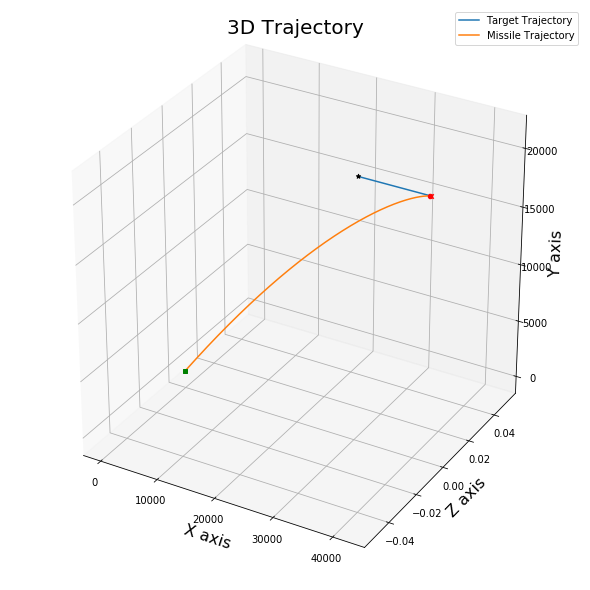

In [16]:
epsilon0 = 35
sigma0 = 0
Vt = 200
Vm = 800
D0 = 37000

xt = D0 * cos(radians(epsilon0))*cos(radians(sigma0))
zt = D0 * cos(radians(epsilon0))*sin(radians(sigma0))
yt = D0 * sin(radians(epsilon0))

dt = 0.1
tf = 1000
 
target = Vehicle(v = 200, x = xt, z = zt, y = yt, theta = radians(0), phi = radians(0))
missile = Vehicle(v = 800, x = 0, z = 0, y = 0, theta = radians(0), phi = radians(0))

G = 0
Guidance_Laws = ["Pure pursuit", "Deviated pursuit", "Porportional navigation"]
Guidance_Law = Guidance_Laws[G]

S = 0
Solvers = ["Euler", "Runge kutta"]
solver = Solvers[S]

manuver_target = False


D, epsilon, sigma, thetam, time = vectorInit()

missflag = 0
missile.theta = epsilon[0]
for i in range(1, len(time)):
    t0 = time[i-1]
    t1 = time[i]
    D0 = D[i-1]
    epsilon0 = epsilon[i-1]
    sigma0 = sigma[i-1]
    
    targetMove(manuver_target)
    D_d, epsilon_d, sigma_d = Solver(t0, D0, epsilon0, sigma0, dt, solver)
    print(D_d, epsilon_d, sigma_d)
    updateObservation()
    
    if abs(D[i]) < 30:
        print("Missile hit the target using ", Guidance_Law," after ", time[i]," seconds")
        break
    elif D[i] > D[i-1]:
        missflag = missflag + 1
        if missflag == 2:
            print("Missile missed the target")
            break
    else:
        missflag = 0
            
    dtheta_m, dphi_m = IdealBond()
    
    # Missile Pursuits
    
    missile.update(0, dtheta_m, dphi_m, dt)
    thetam[i] = missile.theta

PlotTrajectories(target.position, missile.position, "3D", "3D Trajectory")

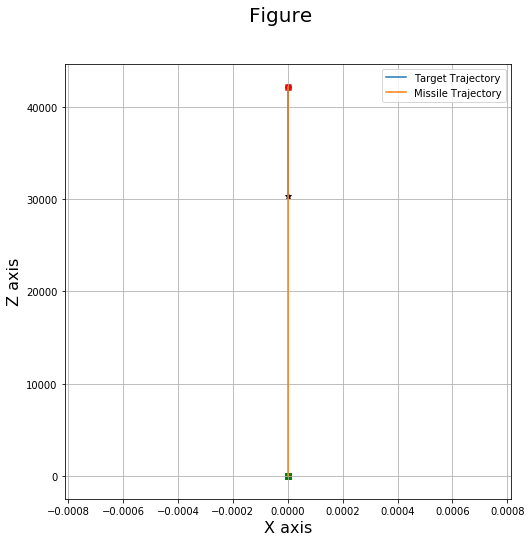

In [13]:
PlotTrajectories(target.position, missile.position, view = "XZ")

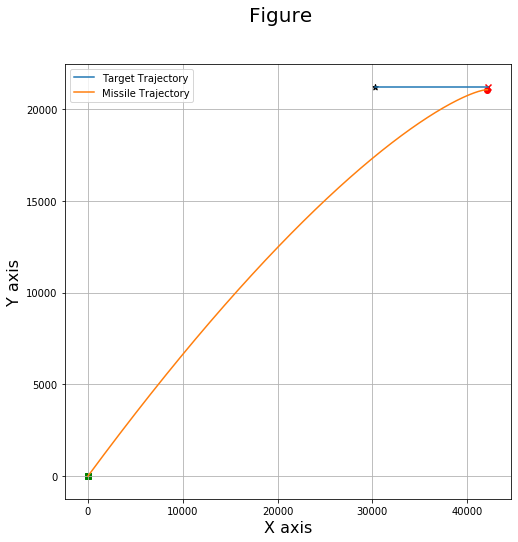

In [14]:
PlotTrajectories(target.position, missile.position, view = "XY")

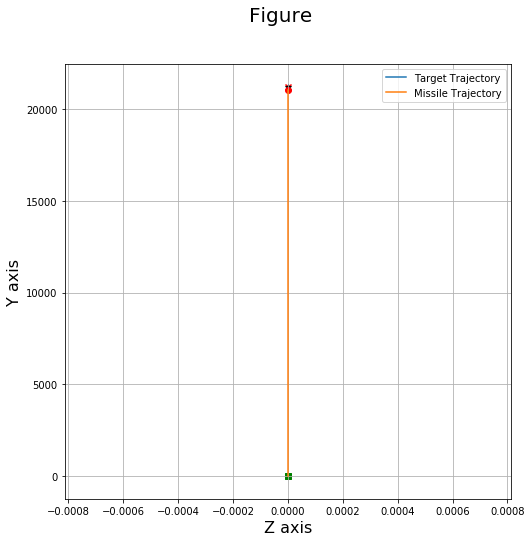

In [15]:
PlotTrajectories(target.position, missile.position, view = "YZ")